In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv("asia10K.csv", sep=None, engine='python', na_values='?')
df = pd.read_csv("australian.dat", sep=None, engine='python', na_values='?')

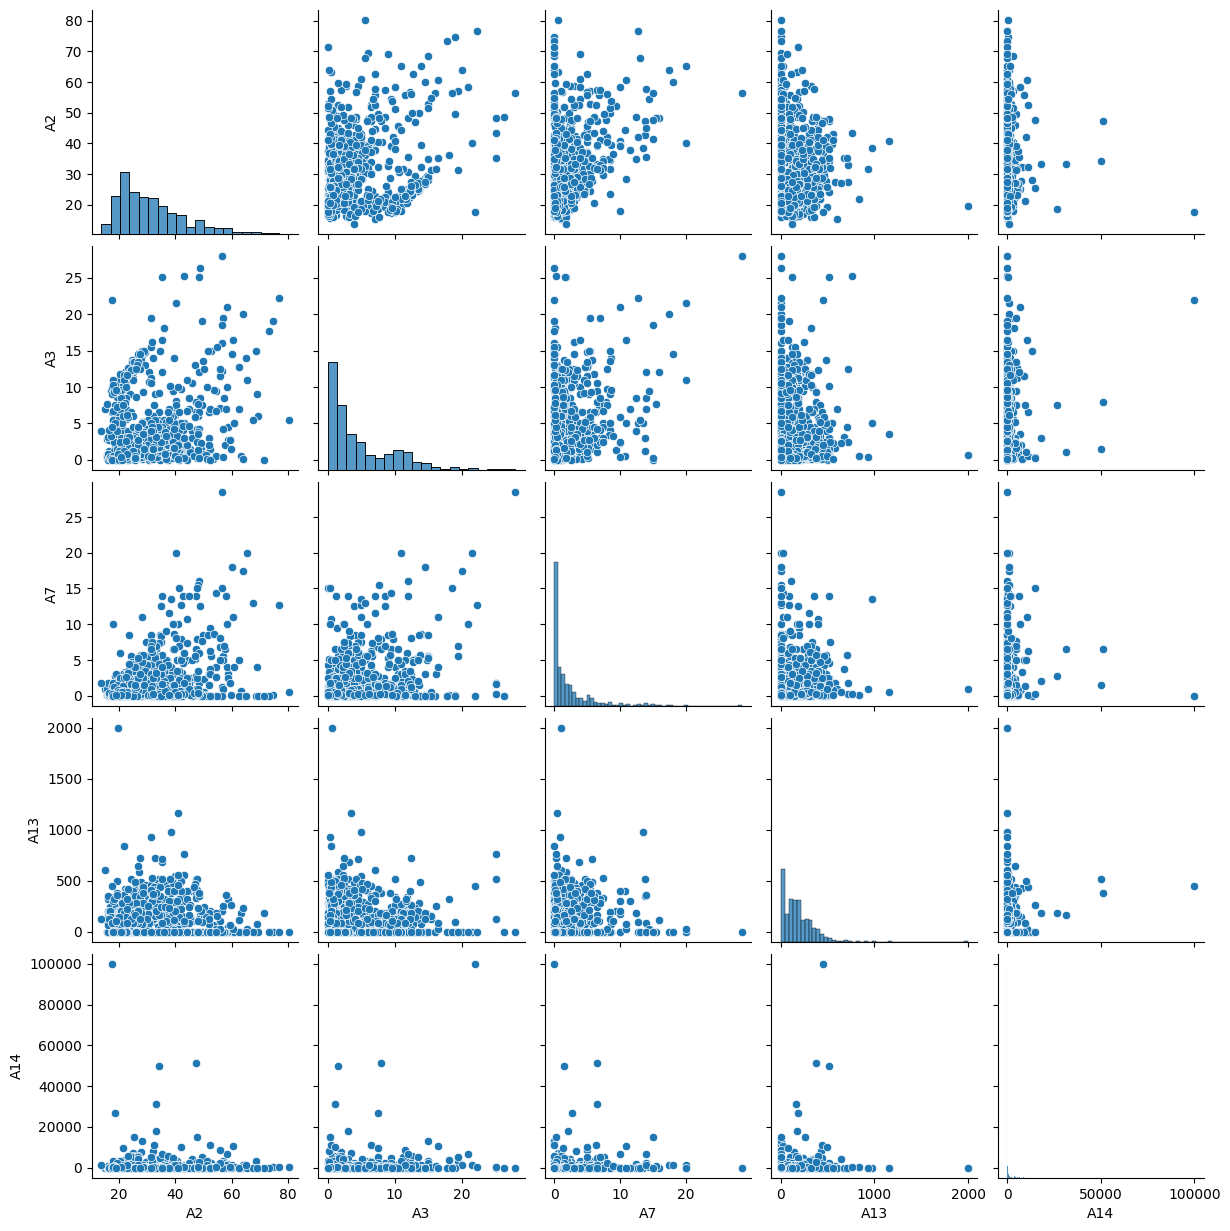

In [10]:
sns.pairplot(df[['A2', 'A3', 'A7', 'A13', 'A14']])

<Axes: xlabel='A14', ylabel='Count'>

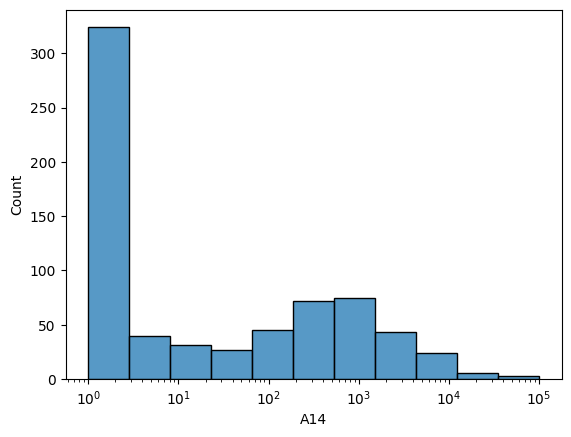

In [12]:
sns.histplot(df['A14'], log_scale=True)

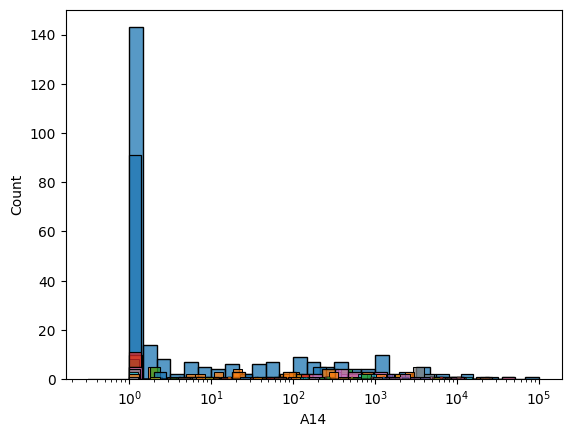

In [30]:
for key, d in df[['A14', 'A8', 'A10']].groupby(['A8', 'A10']):
    sns.histplot(d['A14'], kde=False, bins=30, log_scale=True)

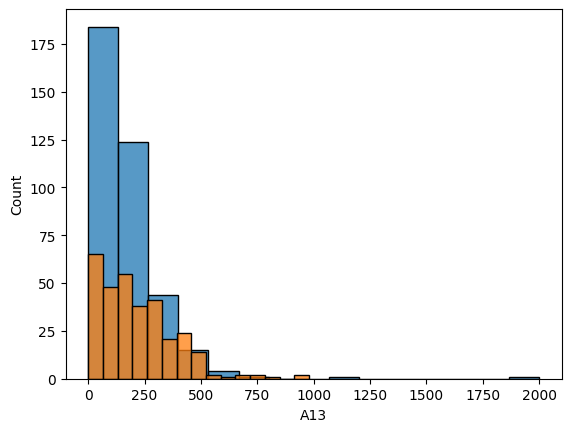

In [25]:
for key, d in df[['A13', 'A11']].groupby('A11'):
    # d.plot(x='A13', y='D', label=key)
    sns.histplot(d['A13'], label=key, kde=False, bins=15)

In [3]:

index_constant = np.where(df.nunique() == 1)[0]
constant_columns = [df.columns[i] for i in index_constant]
df = df.drop(columns=constant_columns)
df = df.dropna(axis=1)
cat_data = df.select_dtypes('object').astype('category')
for c in cat_data:
    df = df.assign(**{c: cat_data[c]})
float_data = df.select_dtypes('number').astype('float64')
for c in float_data:
    df = df.assign(**{c: float_data[c]})

In [4]:
import pybnesian as pbn
# from tigramite.independence_tests.cmiknn_mixed import CMIknnMixed

In [5]:
df.dtypes

class                   category
cap-diameter             float64
cap-shape               category
cap-color               category
does-bruise-or-bleed    category
gill-color              category
stem-height              float64
stem-width               float64
stem-color              category
has-ring                category
habitat                 category
season                  category
dtype: object

In [6]:
df.head(3)

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,p,15.26,x,o,f,w,16.95,17.09,w,t,d,w
1,p,16.60,x,o,f,w,17.99,18.19,w,t,d,u
2,p,14.07,x,o,f,w,17.80,17.74,w,t,d,w


In [7]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled_df = df.copy()
# scaled_df[float_data.columns] = scaler.fit_transform(float_data)

In [10]:
mskcmi.pvalue('cap-diameter','stem-width', 'stem-height')

0.0

In [8]:
mskcmi = pbn.MixedKMutualInformation(df=df, k=50, samples=10, scaling="min_max",gamma_approx=True, adaptive_k=True)


In [ ]:

pdag = pbn.PC().estimate(hypot_test=mskcmi, arc_blacklist = [], arc_whitelist = [], edge_blacklist = [], edge_whitelist = [], verbose = 1)

In [8]:
pdag.arcs(), pdag.edges()

([('Diameter', 'Length'),
  ('Shucked weight', 'Rings'),
  ('Shell weight', 'Height'),
  ('Shell weight', 'Rings'),
  ('Whole weight', 'Viscera weight'),
  ('Sex', 'Viscera weight'),
  ('Whole weight', 'Shucked weight'),
  ('Whole weight', 'Shell weight'),
  ('Sex', 'Whole weight'),
  ('Length', 'Whole weight'),
  ('Shell weight', 'Diameter'),
  ('Whole weight', 'Sex'),
  ('Rings', 'Sex')],
 [])

In [9]:
# cmi = pbn.MutualInformation(df=df)

# pdag_2 = pbn.PC().estimate(hypot_test=cmi, arc_blacklist = [], arc_whitelist = [], edge_blacklist = [], edge_whitelist = [], verbose = 1)

In [10]:
# pdag_2.arcs(), pdag_2.edges()

In [11]:
# rcot = pbn.RCoT(df=float_data)

# pdag_3 = pbn.PC().estimate(hypot_test=rcot, arc_blacklist = [], arc_whitelist = [], edge_blacklist = [], edge_whitelist = [], verbose = 1)

In [12]:
# pdag_3.arcs(), pdag_3.edges()

In [13]:
mskcmi = pbn.MixedKMutualInformation(df=df, k=50, samples=10, scaling="min_max",gamma_approx=True, adaptive_k=True)

cmi = pbn.MutualInformation(df=df)
# from sklearn.preprocessing import LabelEncoder
kcmi = pbn.KMutualInformation(
    df=float_data, k=50, seed=42, samples=10)
# tigramite_cmi = CMIknnMixed(knn=0.1, transform='ranks')
# tigramite_cmi.get_dependence_measure_MSinf(array=df[[var1, var2, var3]].apply(LabelEncoder().fit_transform).to_numpy(), xyz=np.arange(3).reshape((3,)), data_type=np.ones((3), dtype=int)).tolist(),

In [14]:
var1 = 'Length'
var2 = 'Height'
var3 = 'Diameter'

In [15]:
mskcmi.mi(var1, var2, var3), cmi.mi(var1, var2, var3), kcmi.mi(var1, var2, var3)

(-0.05280849146633982, 0.0014830338656315334, 0.013144199138814816)

In [16]:
mskcmi.pvalue(var1, var2), cmi.pvalue(var1, var2), kcmi.pvalue(var1, var2, var3)

(0.0, 0.0, 0.0)

In [15]:
import timeit
timeit.timeit(f"mskcmi.mi('{var1}', '{var2}', '{var3}')",
              globals=globals(), number=50)/50

0.06145088866000151

In [16]:
import timeit
timeit.timeit(
    f"mskcmi.pvalue('{var1}', '{var2}')", globals=globals(), number=10)/100

0.004918814379998367

In [12]:
mskcmi.pvalue('Tuberculosis', 'LungCancer', 'TuberculosisOrCancer')

1.0

In [13]:
mskcmi.mi('Tuberculosis', 'LungCancer', 'TuberculosisOrCancer')

0.02319525873089496

In [9]:
mskcmi.mi('Smoker', 'VisitToAsia')

-0.00015335642231718136

In [29]:
mskcmi.mi('Smoker', 'LungCancer')

0.024363864768286038

In [8]:
mskcmi.pvalue('Tuberculosis', 'LungCancer', 'TuberculosisOrCancer')

ValueError: Column index Tuberculosis do not exist in DataFrame.

In [12]:
mskcmi.mi('Smoker', 'VisitToAsia', ['TuberculosisOrCancer'])

-0.0004076251267193244

In [130]:
mskcmi.mi('Length', 'Sex', 'Shucked weight')

-0.04036570845862181

In [ ]:
mskcmi.mi('Length', 'Diameter', ['Height', 'Whole weight', 'Shucked weight'])

0.2816153296847718

In [14]:
mskcmi = pbn.MixedKMutualInformation(df=df, k=5, samples=20, tree_leafsize=16)

In [ ]:
import timeit
timeit.timeit("mskcmi.mi('Length', 'Sex', 'Shucked weight')",
              globals=globals(), number=30)/30

0.049761940466729965

In [ ]:
import timeit
timeit.timeit("mskcmi.mi('Smoker', 'VisitToAsia')",
              globals=globals(), number=30)/30

ValueError: Column index Smoker do not exist in DataFrame.

In [ ]:
import timeit
timeit.timeit("mskcmi.mi('Smoker', 'LungCancer')",
              globals=globals(), number=30)/30

0.08824051839995567

In [ ]:
import timeit
timeit.timeit("mskcmi.mi('Length', 'Sex')", globals=globals(), number=30)/30

0.004968380633363268

In [ ]:
import timeit
timeit.timeit(
    "mskcmi.mi('Length', 'Sex', ['Height','Whole weight','Shucked weight'])", globals=globals(), number=20)/20

0.0698433584499071

In [ ]:
import timeit
timeit.timeit(
    "mskcmi.mi('Smoker', 'LungCancer', ['TuberculosisOrCancer', 'Bronchitis', 'Dyspnea', 'Tuberculosis'])", globals=globals(), number=20)/20

ValueError: Column index Smoker do not exist in DataFrame.

In [ ]:
import knncmi as ms

ms.cmi(['Smoker'], ['VisitToAsia'], ['TuberculosisOrCancer',
       'Bronchitis', 'Dyspnea', 'Tuberculosis'], 30, df)

np.float64(6.30440940406908e-05)

In [ ]:
ms.cmi(['Length'], ['Sex'], ['Height', 'Whole weight',
       'Shucked weight'], 30, scaled_df)

np.float64(0.01409907770234893)

In [ ]:
import knncmi as ms

ms.cmi(['Length'], ['Sex'], [], 30, scaled_df)

NameError: name 'scaled_df' is not defined

In [ ]:
import timeit
timeit.timeit("ms.cmi( ['Smoker'], ['LungCancer'],[], 5, df)",
              globals=globals(), number=20)/20

3.451859858700118

In [ ]:
import timeit
timeit.timeit("ms.cmi( ['Length'], ['Diameter'],[], 30, scaled_df)",
              globals=globals(), number=20)/20

0.5322824361500352

In [21]:
kcmi = pbn.KMutualInformation(
    df=df[float_data.columns], k=50, samples=20)

In [28]:
import timeit
timeit.timeit(f"kcmi.mi('{var1}', '{var2}', '{var3}')",
              globals=globals(), number=50)/50

0.04777313841999785

In [ ]:
import timeit
timeit.timeit("kcmi.mi('Length', 'Diameter')", globals=globals(), number=30)/30

0.007938058799967014

In [ ]:
import timeit
timeit.timeit("kcmi.pvalue('Length', 'Diameter')",
              globals=globals(), number=30)/600

0.008219302231664187

In [33]:
kcmi.pvalue('Length', 'Diameter', 'Height')

0.0

In [ ]:
kcmi.pvalue('Length', 'Diameter', ['Height', 'Whole weight', 'Shucked weight'])

0.0

In [ ]:
import timeit
timeit.timeit("kcmi.mi('Length', 'Diameter')", globals=globals(), number=20)/20

0.01945544370000789

In [ ]:
# sepsets = pbn.PC().compute_sepsets_of_size(pbn.PartiallyDirectedGraph().CompleteUndirected(
#             nodes=df.columns.to_list()),
#                                                    pbn.MutualInformation(
#                 df=df),

#                                                    [],
#                                                    [],
#                                                    [],
#                                                    [],
#                                                    1)

In [ ]:
# import random
# pdag = pbn.PartiallyDirectedGraph().CompleteUndirected(
#     nodes=df.columns.to_list())

# rows_source = pd.DataFrame(itertools.combinations(df.columns, 2), columns=[
#                                    'Source', 'Target'])
# for idx, row in rows_source.iterrows():
#     if random.randint(0, 10) > 6:
#         pdag.remove_edge(row['Source'], row['Target'])

In [ ]:
# x = pbn.PC().compute_v_structures(pdag,
#     pbn.MutualInformation(
#     df=df),
#     alpha=0.05,
#     use_sepsets=False,
#     ambiguous_threshold = 0.5)
# x

In [ ]:
pdag.arcs()

NameError: name 'pdag' is not defined

In [ ]:
pdag.undirect('LungCancer', 'TuberculosisOrCancer')

In [ ]:
x = pbn.MeekRules.all_rules_sequential_interactive(pdag,
                                                   )
x

[((4, 1), 1)]

In [ ]:
# pdag.arcs()

In [ ]:
# pdag.edges()

In [ ]:
# pdag.to_dag()

In [ ]:
# session_dict = [x for x in session_objects.values()][0]
# op_set = session_dict['op_set']
# score = session_dict['score']


# ghc = pbn.GreedyHillClimbing()
# session_dict['bn'] = ghc.estimate(
#     start=session_dict['bn'],
#     score=score,
#     operators=op_set,
#     arc_blacklist=[
#         list(d.values()) for d in session_dict['arc_blacklist']],
#     arc_whitelist=[
#         list(d.values()) for d in session_dict['arc_whitelist']],
#     max_indegree=session_dict['max_indegree'],
#     patience=50
# )

In [ ]:
# df = pd.read_csv('mushroom_mixed.csv', sep=None, engine='python')
# df = df.dropna(axis=1).iloc[:10000, :]
# df[df.select_dtypes(include='object').columns] = df.select_dtypes(
#     include='object').astype('category')
# df[df.select_dtypes(include='int').columns] = df.select_dtypes(
#     include='int').astype('str').astype('category')

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = '2'

In [ ]:
app.run(debug=True, use_reloader=False, port=8050)

AssertionError: The setup method 'errorhandler' can no longer be called on the application. It has already handled its first request, any changes will not be applied consistently.
Make sure all imports, decorators, functions, etc. needed to set up the application are done before running it.

In [ ]:
# g = np.vectorize(lambda i, j: bic.local_score(bn, np.array(delta_frontend_df.columns.to_list())[i], [np.array(delta_frontend_df.columns.to_list())[j]]))
# pd.DataFrame(np.fromfunction(g, (len(df.columns), len(df.columns)), dtype=int), columns=df.columns)

In [ ]:
# def recv_process():
#     shutil.rmtree('prueba', ignore_errors=True)
#     os.mkdir("prueba")
#     pbn.hc(pd.DataFrame(np.ones(shape=(8,8))), bn_type=pbn.GaussianNetworkType(), score='bic', operators=['arcs'], patience=40)

In [ ]:
# from multiprocessing import Process
# p = Process(target=recv_process)
# p.start()
# import time
# import zmq

# context = zmq.Context()

# #  Socket to talk to server
# print("Connecting to hello world server…")
# socket = context.socket(zmq.REQ)
# socket.connect("tcp://localhost:5555")

# #  Do 10 requests, waiting each time for a response
# for request in range(10):
#     print("Sending request %s …" % request)
#     socket.send_string("Hello from Python!")

#     #  Get the reply.
#     me ssage = socket.recv_string()
#     print("Received reply %s [ %s ]" % (request, message))


# p.join()

In [ ]:
# jupyter_dash.inline_exceptions = False

: 

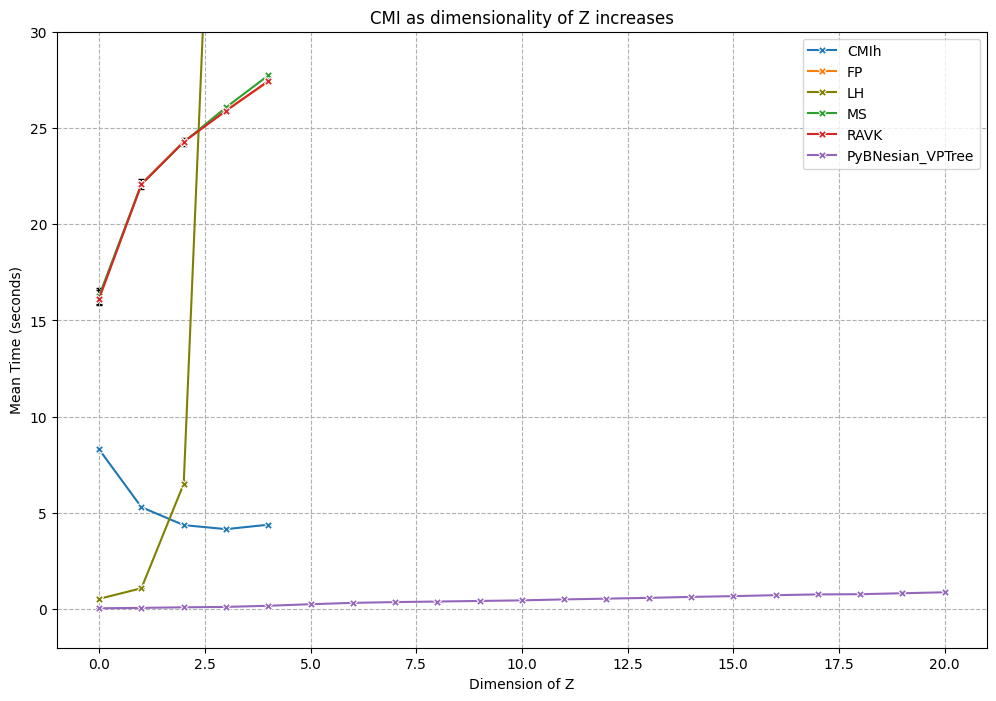

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data
dim_z = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
         11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
models = ['CMIh', 'FP', 'LH', 'MS', 'RAVK', 'PyBNesian_VPTree']

# Mean time in seconds
mean_time = {
    'CMIh': [8.30, 5.30, 4.37, 4.16, 4.39] + [np.nan] * 16,
    'FP': [16.19, 22.09, 24.28, 25.91, 27.41] + [np.nan] * 16,
    'LH': [0.54, 1.09, 6.52, 58.58, 691.68] + [np.nan] * 16,
    'MS': [16.28, 22.08, 24.26, 26.07, 27.73] + [np.nan] * 16,
    'RAVK': [16.14, 22.07, 24.28, 25.89, 27.44] + [np.nan] * 16,
    'PyBNesian_VPTree': [0.05, 0.07, 0.10, 0.12, 0.18, 0.26, 0.33, 0.37, 0.40, 0.43, 0.46, 0.51, 0.55, 0.59, 0.64, 0.68, 0.73, 0.77, 0.78, 0.83, 0.88]
}

# Standard deviation
stdev = {
    'CMIh': [0.14, 0.05, 0.04, 0.04, 0.08] + [np.nan] * 16,
    'FP': [0.40, 0.27, 0.21, 0.08, 0.07] + [np.nan] * 16,
    'LH': [0.07, 0.02, 0.12, 13.74, 123.90] + [np.nan] * 16,
    'MS': [0.40, 0.07, 0.10, 0.06, 0.06] + [np.nan] * 16,
    'RAVK': [0.11, 0.07, 0.08, 0.09, 0.14] + [np.nan] * 16,
    'PyBNesian_VPTree': [0.0017, 0.0019, 0.0033, 0.0037, 0.0064, 0.0070, 0.0068, 0.0086, 0.0122, 0.0082, 0.0087, 0.0105, 0.0148, 0.0139, 0.0205, 0.0289, 0.0338, 0.0372, 0.0621, 0.0668, 0.0645]
}

# Plotting
plt.figure(figsize=(12, 8))

for model in models:
    if model == 'LH':
        ax = sns.lineplot(
            x=dim_z, y=mean_time[model], label=model, marker='X', c='olive')
    else:
        ax = sns.lineplot(x=dim_z, y=mean_time[model], label=model, marker='X')
    ax.errorbar(dim_z, mean_time[model], yerr=stdev[model],
                fmt='none', capsize=2, zorder=1, color='black')

# plt.xscale('log')
# plt.yscale('log')
plt.ylim(-2, 30)
plt.xlabel('Dimension of Z')
plt.ylabel('Mean Time (seconds)')
plt.title('CMI as dimensionality of Z increases')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()